<a href="https://colab.research.google.com/github/pabloinsente/CovNet_Human_Drawings/blob/master/compare_all_models_dap_age_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model comparison age-group classification Draw-a-Person

In [0]:
import pandas as pd

## Read in classification report datasets

In [0]:
# Import data / for now I'll directly upload data to Colab
# Replace with ! git clone https://github.com/pabloinsente/CovNet_Human_Drawings later

In [49]:
# read csv as dataframe
net_df = pd.read_csv('classification_report_dap_1.csv') 
ml_df = pd.read_csv('classification_report_dap_ml_classifiers.csv')

print('neural nets', net_df.shape)
print('classifiers', ml_df.shape)

neural nets (10, 15)
classifiers (6, 15)


In [50]:
# Explore neural nets dataset
net_df.head()

,Unnamed: 0,Criteria,True_Negatives,False_Positives,False_Negatives,True_Positives,True_Negatives_Per,False_Positives_Per,False_Negatives_Per,True_Positives_Per,Hit_Rate,False_Alarm_Rate,d_sensitivity,c_bias,Test_Accuracy_Score
0,0,acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
1,1,fmeasure_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
2,2,recall_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
3,3,precision_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
4,4,matthews_correlation_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949


In [51]:
# Explore classifiers dataset
ml_df.head()

,Unnamed: 0,Model,True_Negatives,False_Positives,False_Negatives,True_Positives,True_Negatives_Per,False_Positives_Per,False_Negatives_Per,True_Positives_Per,Hit_Rate,False_Alarm_Rate,d_sensitivity,c_bias,Test_Accuracy_Score
0,0,LogisticRegression,60,3,14,1,0.952381,0.047619,0.933333,0.066667,0.066667,0.047619,0.167305,1.584739,0.782051
1,1,SVC,62,1,15,0,0.984127,0.015873,1.000000,0.000000,0.033333,0.015873,0.313679,1.990754,0.794872
2,2,DecisionTreeClassifier,50,13,13,2,0.793651,0.206349,0.866667,0.133333,0.133333,0.206349,-0.291617,0.964963,0.666667
3,3,GaussianNB,55,8,14,1,0.873016,0.126984,0.933333,0.066667,0.066667,0.126984,-0.360322,1.320925,0.717949
4,4,RandomForestClassifier,63,0,15,0,1.000000,0.000000,1.000000,0.000000,0.033333,0.007937,0.577908,2.122868,0.807692


## Merge data 

In [55]:
# Rename net_df "Criteria" to "Model" to merge
net_df.rename(columns={'Criteria': 'Model'}, inplace=True)
net_df.head(2)

,Unnamed: 0,Model,True_Negatives,False_Positives,False_Negatives,True_Positives,True_Negatives_Per,False_Positives_Per,False_Negatives_Per,True_Positives_Per,Hit_Rate,False_Alarm_Rate,d_sensitivity,c_bias,Test_Accuracy_Score
0,0,acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
1,1,fmeasure_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949


In [56]:
# Merge datasets
df = pd.concat([net_df, ml_df]) 
df = df.drop(df.columns[0], axis=1) # drop index col
df = df.reset_index(drop=True) # reset index
df

,Model,True_Negatives,False_Positives,False_Negatives,True_Positives,True_Negatives_Per,False_Positives_Per,False_Negatives_Per,True_Positives_Per,Hit_Rate,False_Alarm_Rate,d_sensitivity,c_bias,Test_Accuracy_Score
0,acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
1,fmeasure_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
2,recall_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
3,precision_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
4,matthews_correlation_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
5,val_acc,54,11,9,4,0.830769,0.169231,0.692308,0.307692,0.307692,0.169231,0.454807,0.729806,0.743590
6,val_fmeasure_acc,51,14,7,6,0.784615,0.215385,0.538462,0.461538,0.461538,0.215385,0.691317,0.442217,0.730769
7,val_recall_acc,35,30,5,8,0.538462,0.461538,0.384615,0.615385,0.615385,0.461538,0.389940,-0.098411,0.551282
8,val_precision_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949
9,val_matthews_correlation_acc,50,15,7,6,0.769231,0.230769,0.538462,0.461538,0.461538,0.230769,0.639757,0.416437,0.717949


In [72]:
# Subset dataset keeping (1) the best neural net AND (2) all the ML classifiers
keep = ['val_fmeasure_acc', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier',
        'GaussianNB', 'RandomForestClassifier', 'GradientBoostingClassifier' ]

df_report = df.loc[df['Model'].isin(keep)]
df_report = df_report.reset_index(drop=True) # reset index


df_report

,Model,True_Negatives,False_Positives,False_Negatives,True_Positives,True_Negatives_Per,False_Positives_Per,False_Negatives_Per,True_Positives_Per,Hit_Rate,False_Alarm_Rate,d_sensitivity,c_bias,Test_Accuracy_Score
0,val_fmeasure_acc,51,14,7,6,0.784615,0.215385,0.538462,0.461538,0.461538,0.215385,0.691317,0.442217,0.730769
1,LogisticRegression,60,3,14,1,0.952381,0.047619,0.933333,0.066667,0.066667,0.047619,0.167305,1.584739,0.782051
2,SVC,62,1,15,0,0.984127,0.015873,1.000000,0.000000,0.033333,0.015873,0.313679,1.990754,0.794872
3,DecisionTreeClassifier,50,13,13,2,0.793651,0.206349,0.866667,0.133333,0.133333,0.206349,-0.291617,0.964963,0.666667
4,GaussianNB,55,8,14,1,0.873016,0.126984,0.933333,0.066667,0.066667,0.126984,-0.360322,1.320925,0.717949
5,RandomForestClassifier,63,0,15,0,1.000000,0.000000,1.000000,0.000000,0.033333,0.007937,0.577908,2.122868,0.807692
6,GradientBoostingClassifier,58,5,15,0,0.920635,0.079365,1.000000,0.000000,0.033333,0.079365,-0.424559,1.621635,0.743590


In [91]:
# Change val_fmeasure_acc label

df_report.at[0, 'Model'] = 'Deep_Neural_Net'
df_report

,Model,True_Negatives,False_Positives,False_Negatives,True_Positives,True_Negatives_Per,False_Positives_Per,False_Negatives_Per,True_Positives_Per,Hit_Rate,False_Alarm_Rate,d_sensitivity,c_bias,Test_Accuracy_Score
0,Deep_Neural_Net,51,14,7,6,0.784615,0.215385,0.538462,0.461538,0.461538,0.215385,0.691317,0.442217,0.730769
1,LogisticRegression,60,3,14,1,0.952381,0.047619,0.933333,0.066667,0.066667,0.047619,0.167305,1.584739,0.782051
2,SVC,62,1,15,0,0.984127,0.015873,1.000000,0.000000,0.033333,0.015873,0.313679,1.990754,0.794872
3,DecisionTreeClassifier,50,13,13,2,0.793651,0.206349,0.866667,0.133333,0.133333,0.206349,-0.291617,0.964963,0.666667
4,GaussianNB,55,8,14,1,0.873016,0.126984,0.933333,0.066667,0.066667,0.126984,-0.360322,1.320925,0.717949
5,RandomForestClassifier,63,0,15,0,1.000000,0.000000,1.000000,0.000000,0.033333,0.007937,0.577908,2.122868,0.807692
6,GradientBoostingClassifier,58,5,15,0,0.920635,0.079365,1.000000,0.000000,0.033333,0.079365,-0.424559,1.621635,0.743590


In [0]:
# save report on a csv file
exp_n = '_1_'
file_name = 'compare_all_models' + exp_n + '.csv'
df_report.to_csv(file_name, sep=',')

## Plots

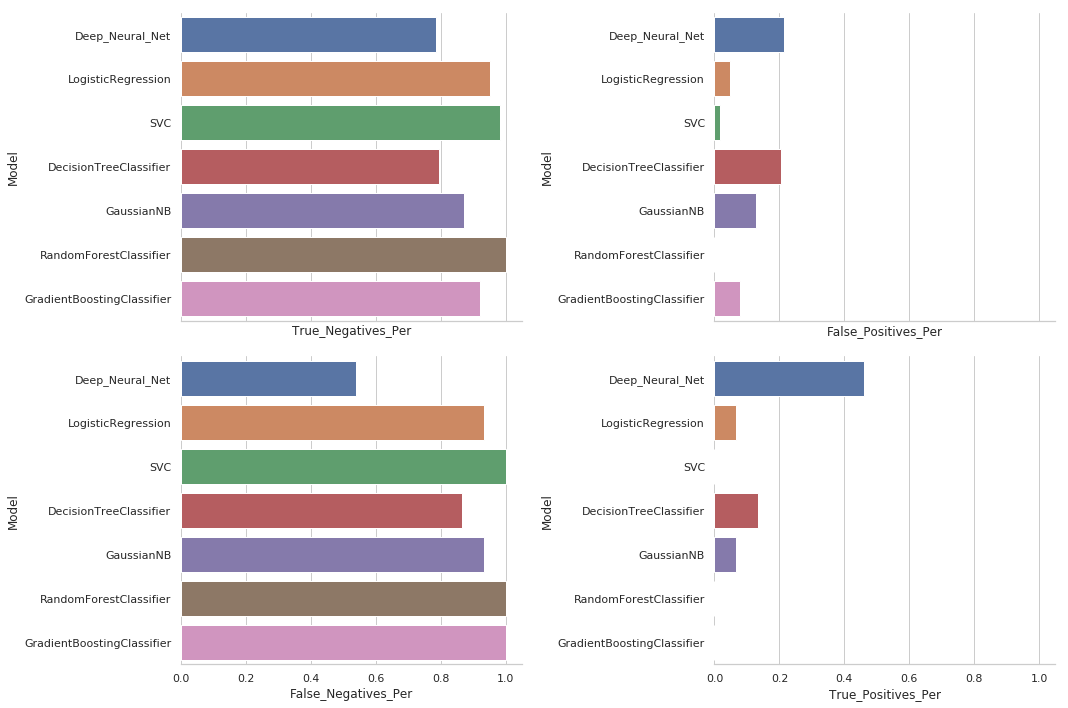

In [92]:
# Plot confusion matrix as percentage

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.despine(left=True)

sns.barplot(x="True_Negatives_Per", y= "Model", data=df_report, ax=axes[0, 0])
sns.barplot(x="False_Positives_Per", y= "Model", data=df_report, ax=axes[0, 1])
sns.barplot(x="False_Negatives_Per", y= "Model", data=df_report, ax=axes[1, 0])
sns.barplot(x="True_Positives_Per", y= "Model", data=df_report, ax=axes[1, 1])


plt.tight_layout()
plt.savefig('confusion_matrix_percentage_all_models.pdf')

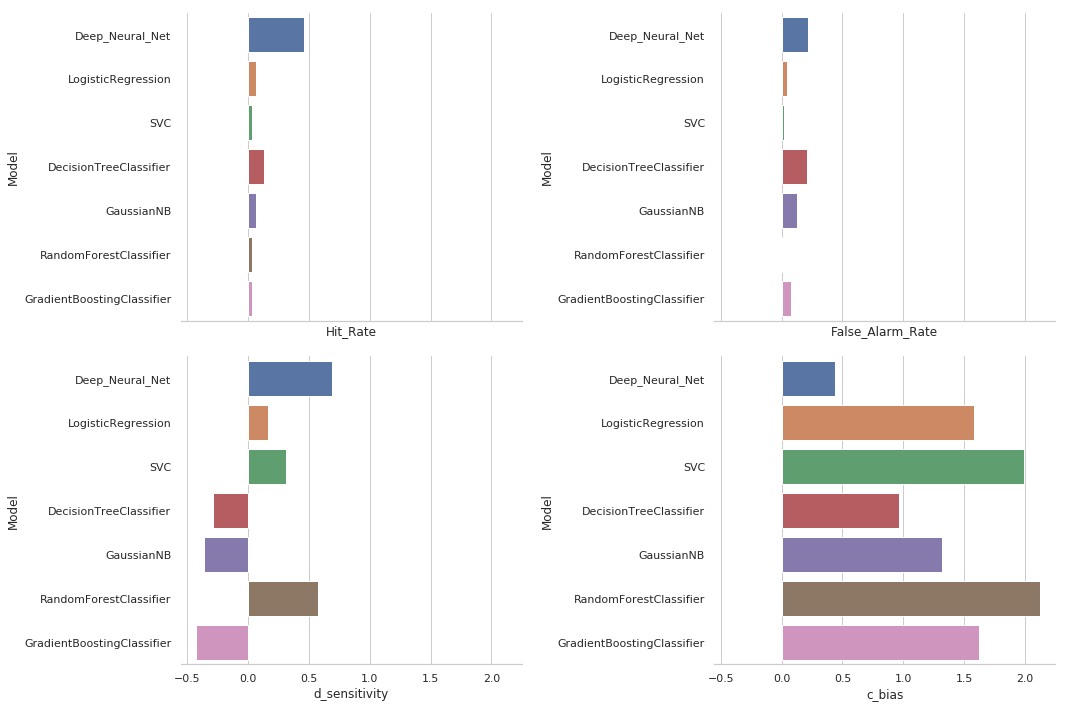

In [93]:
# Plot hit rate, false alarm rate, sensitivity, and bias for all models

sns.set(style="whitegrid")

f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.despine(left=True)

sns.barplot(x="Hit_Rate", y= "Model", data=df_report, ax=axes[0, 0])
sns.barplot(x="False_Alarm_Rate", y= "Model", data=df_report, ax=axes[0, 1])
sns.barplot(x="d_sensitivity", y= "Model", data=df_report, ax=axes[1, 0])
sns.barplot(x="c_bias", y= "Model", data=df_report, ax=axes[1, 1])

plt.tight_layout()
plt.savefig('signal_detection_report_all_models.pdf')

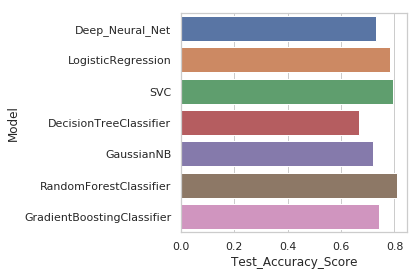

In [94]:
# Plot test accuracy for all models

sns.set(style="whitegrid")

sns.despine(left=True)

sns.barplot(x="Test_Accuracy_Score", y= "Model", data=df_report)

plt.tight_layout()
plt.savefig('test_accuracy_all_models.pdf')